# Testing parameter change at higher concentrations of lactate
While the model fits the data, the response plateaus very quick, while in the last datapoint we see a much higher response.
This might be caused by an underlying mechanism that the model doesnt capture. Here I tried to simulate what would happen if the activated production was much higher at the final concentration. It isnt much of a suprise that now we can get the model to fit right, however when we use the same parameter set for lower concentrations the fit is much worse.

# Figures for wiki/presentation
At the end I have some code to generate an example desired dose-response curve.
Also a graph with all timeseries in there vs the model prediction

In [1]:
#Import/Initialization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #plotting
import sys
from importlib import reload

sys.path.append("models/")

%matplotlib inline

#Define our color pallette
colors = {'Orange': '#fba649', "Turquoise": '#45c4af', "Red": '#ec6c5f', "Green": '#4D8B31', "Purple": '#641877'}
#Define standard text sizes
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

dashline = (1, (3, 3))
#Bar plot parameters
BAR_WIDTH = 0.30
SPACING = 0.05
CAP_SIZE = 5
SCALE = 2

color_list = np.array([np.array([251,166,73], dtype='int'),np.array([69,196,175], dtype='int'),np.array([236,108,95], dtype='int'),
                       np.array([76,139,48], dtype='int'),np.array([100,25,120], dtype='int'),np.array([221,204,119], dtype='int'),
                       np.array([204,121,167], dtype='int')])/255

from cycler import cycler
custom_cycler = (cycler(color=color_list, linewidth=np.ones(len(color_list))*2))

plt.rc('axes', prop_cycle=custom_cycler)


In [2]:
import Lactatemodel_succinate_p3
reload(Lactatemodel_succinate_p3)
from Lactatemodel_succinate_p3 import Lactate_model_succinate_p3
model = Lactate_model_succinate_p3()

Model initiated!
index 0: k_b_p3
index 1: k_b_p11
index 2: k_op_succ
index 3: k_pt_lldr
index 4: k_pt_gfp
index 5: k_f_lldrcomplex
index 6: k_d_lldrmRNA
index 7: k_d_lldr
index 8: k_d_lldrcomplex
index 9: k_d_gfpmRNA
index 10: k_d_gfp
index 11: alpaga_basal
index 12: alpaga_act1
index 13: alpaga_act2
index 14: alpaga_k3
index 15: alpaga_k_act1
index 16: alpaga_k_act2
index 17: copy_nr
index 18: mumax
index 19: tc
index 20: cap
index 21: sigma
index 22: gamma
index 23: scale


In [3]:
def simulate_concentrations_alpagaact2(model, p, concentrations):
    """
    Simulate the model for each concentration in the data.
    Returns a list of time series for each concentration.

    GFP is divided by OD and scaled by the scale factor.(p[-1])
    """
    gfp_outputs = []
    p= [elem for elem in p]
        
    for i in concentrations:
        if i >= 20:
            p[13] = p[13]*1.8
            print(p[13])
        sim_time, sim_output, sim_time2, sim_output2 = model.simulate_experiment(p, model.init, 0, i)
        #Get the GFP output and divide by the OD and scale.
        gfp_output = sim_output2[:,-2]*p[-1]
        #Append the FLUOD simulation output
        gfp_outputs.append(gfp_output)

    #Which format do we want to return the data in?
    gfp_outputs = np.array(gfp_outputs).T
    #Return the outputs and time as FLUOD
    return gfp_outputs, sim_time2

39.909600000000005


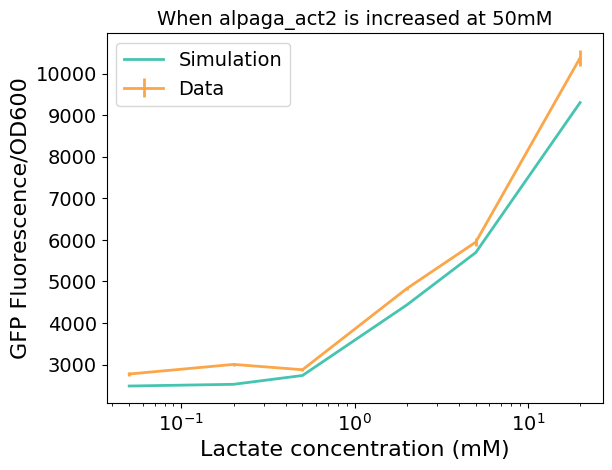

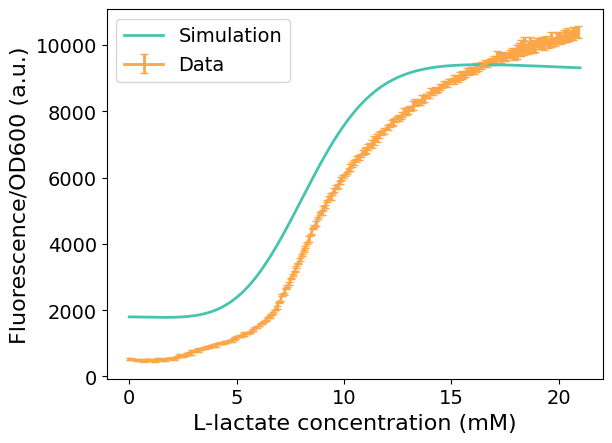

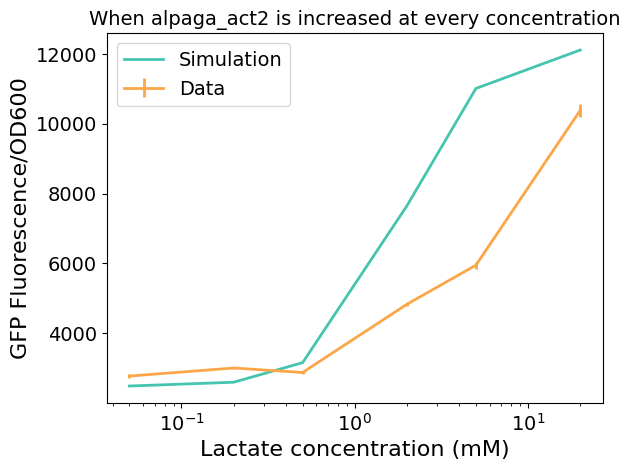

In [4]:
def simulate_concentrations_alpagaact2_k2(model, p, concentrations):
    """
    Simulate the model for each concentration in the data.
    Returns a list of time series for each concentration.

    GFP is divided by OD and scaled by the scale factor.(p[-1])
    
    Changes act2 and the activation constant
    normal = 6.72 , 60
    """
    gfp_outputs = []
    p= [elem for elem in p]
    
    p[13] = p[13]*2.5
    for i in concentrations:          
        sim_time, sim_output, sim_time2, sim_output2 = model.simulate_experiment(p, model.init, 0, i)
        #Get the GFP output and divide by the OD and scale.
        gfp_output = sim_output2[:,-2]*p[-1]
        #Append the FLUOD simulation output
        gfp_outputs.append(gfp_output)

    #Which format do we want to return the data in?
    gfp_outputs = np.array(gfp_outputs).T
    #Return the outputs and time as FLUOD
    return gfp_outputs, sim_time2

gfp_outputs, simtime2 = simulate_concentrations_alpagaact2(model, model.params, model.concentrations_data)

#Plot the simulation
plt.figure()
plt.errorbar(model.concentrations_data, model.dose_response, model.dose_response_error, label="Data")
plt.plot(model.concentrations_data, gfp_outputs[-1,:], label="Simulation")
plt.title("When alpaga_act2 is increased at 50mM")
plt.xlabel("Lactate concentration (mM)")
plt.xscale("log")
plt.ylabel("GFP Fluorescence/OD600")
plt.legend()
plt.show()

#Plot the time-series for 50mM
plt.figure()
plt.errorbar(model.time, model.FLUOD_data_p3[:,-1], model.FLUOD_error_p3[:,-1], label="Data", capsize=3)
plt.plot(simtime2, gfp_outputs[:,-1], label="Simulation")
#plt.title("When alpaga_act2 is increased at 50mM")
plt.xlabel("L-lactate concentration (mM)")
plt.ylabel("Fluorescence/OD600 (a.u.)")
plt.legend()
plt.show()

gfp_outputs, simtime2 = simulate_concentrations_alpagaact2_k2(model, model.params, model.concentrations_data)

#Plot the simulation
plt.figure()
plt.errorbar(model.concentrations_data, model.dose_response, model.dose_response_error, label="Data")
plt.plot(model.concentrations_data, gfp_outputs[-1,:], label="Simulation")
plt.title("When alpaga_act2 is increased at every concentration")
plt.xlabel("Lactate concentration (mM)")
plt.xscale("log")
plt.ylabel("GFP Fluorescence/OD600")
plt.legend()
plt.show()

## Plotting simulations vs data - for the wiki

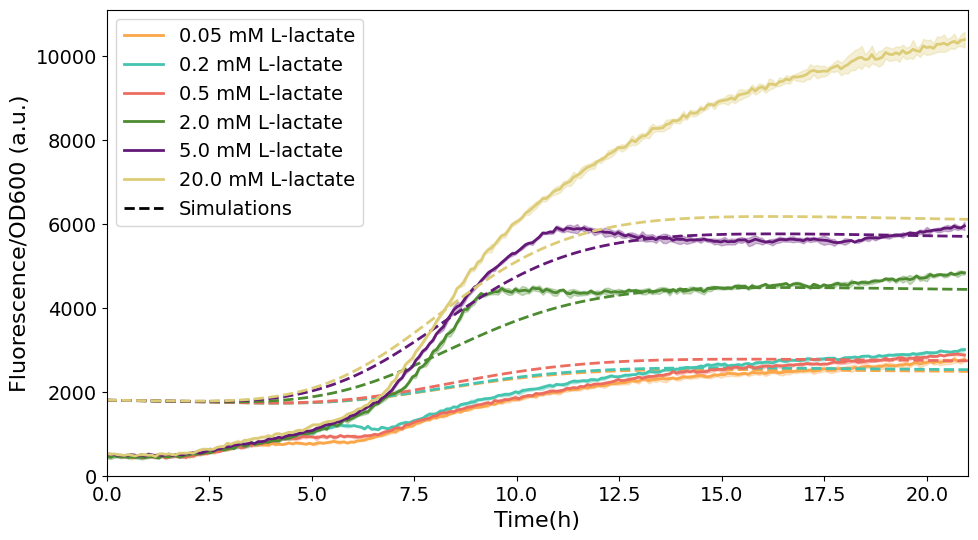

In [5]:
simulations = []
for i in model.concentrations_data:
    sim_time, sim_output, sim_time2, sim_output2 = model.simulate_experiment(model.params, model.init, 0, i)
    simulations.append(sim_output2[:,-2]*model.params[-1])

#Plot the simulation
plt.figure(figsize=(10,5.625))
for i, simulation in enumerate(simulations):
    plt.plot(sim_time2, simulation, color=color_list[i], linestyle='--')
    plt.fill_between(model.time, model.FLUOD_data_p3[:,i]-model.FLUOD_error_p3[:,i], model.FLUOD_data_p3[:,i]+model.FLUOD_error_p3[:,i], color=color_list[i], alpha=0.3)
    plt.plot(model.time, model.FLUOD_data_p3[:,i],  color=color_list[i], label=f"{model.concentrations_data[i]} mM L-lactate")

plt.plot(0,0, linestyle='--', label="Simulations", color="black")    
plt.xlabel("Time(h)")
plt.xlim([0,21])
plt.ylabel("Fluorescence/OD600 (a.u.)")
plt.ylim(ymin=0)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("figures/Lactatemodel_simulations.svg", dpi=300)
plt.show()

In [6]:
#Dose-response curve
model.report_results(np.array([0]),model.params,folder="figures/wikifigures_311test")

The best parameters were: [38.422, 2.275, 2.784, 8.91, 0.705, 0.234, 7.939, 3.758, 0.768, 0.067, 0.003, 7.8, 3.904, 22.172, 1.933, 42.532, 67.022, 5.199, 0.405, 10.423, 0.234, 4.292, 4.462, 59.633] and gave a score of: 0


['$k\_b_{dcas}$','$k\_op_{succ}$', '$k\_b_{p3}$', '$k\_b_{sgrna}$','$k\_d_{ascascomplex}$','$k\_d_{ascomplex}$','$k\_d_{asrna}$','$k\_d_{cascomplex}$','$k\_d_{dcas}$','$k\_d_{dcasmrna}$','$k\_d_{gfp}$','$k\_d_{gfpmrna}$','$k\_d_{lldr}$','$k\_d_{lldrcomplex}$','$k\_d_{lldrmrna}$','$k\_d_{sgrna}$','$k\_f_{3_{fw}}$','$k\_f_{3_{rv}}$','$k\_f_{4_{fw}}$','$k\_f_{4_{rv}}$','$k\_f_{2_{fw}}$','$k\_f_{2_{rv}}$','$k\_f_{1_{fw}}$','$k_\f_{1_{rv}}$','$k\_f_{lldrcomplex}$','$k\_b_{alp}$','$alp_{act1}$','$alp_{act2}$','$alp\_k_{act1}$','$alp\_k_{act2}$','$alp_{k3}$','$k\_p_{gfpmrna}$','$k\_pt_{dcas}$','$k\_pt_{gfp}$','$k\_pt_{lldr}$','$kd_{dcas}$','$n_{alpaga}$','$n_{cascomplex}$','$copy\_nr$','$\mumax$','$t_c$','$cap$','$\sigma$','$scale$']

[0.4192071789636293, 1.8573299596852904, 7.666864432500126]


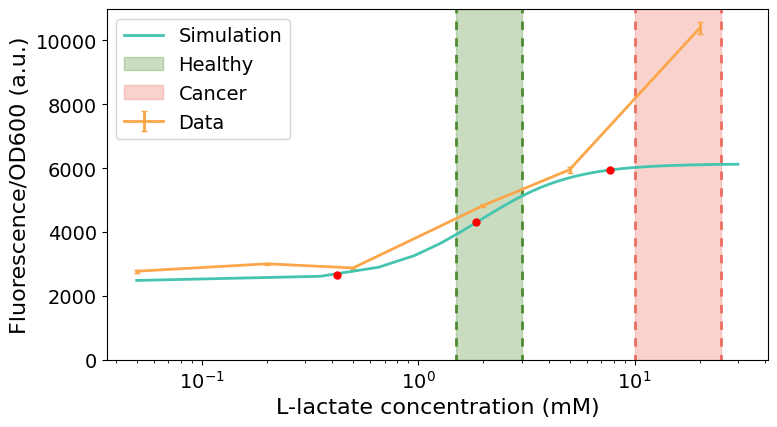

In [7]:
model.params = [elem for elem in model.parameters_standard]
#gfp_outputs, simtime2 = simulate_concentrations_alpagaact2(model, model.params, model.concentrations_data)
gfp_outputs, simtime2 = model.simulate_concentrations(model.params, model.concentrations_data)
#Plot the outcome against the data
#Compare simulation vs data for the best parameter set

import scipy.interpolate as interpolate
#Desired plot
def logistic4(x, A, B, C, D):
    """4PL lgoistic equation."""
    return ((A-D)/(1.0+((x/C)**B))) + D

x = np.linspace(0.05,30,100)
A,B,C,D = 100,8,5,10000
y = logistic4(x, A, B, C, D)

def calculate_ec(concentrations, response, ec_percent):
    """
    Used to calculate the desired EC value from a dose-response curve.

    Args:
        concentrations : List/array of concentrations
        response : List/array of responses
        ec_percent : Percentage of the maximum response to calculate the EC for

    Returns:
        ec_conc : The ECx concentration
        ec_response : The ECx response
    """
    ec_response = (max(response)-min(response))*ec_percent+min(response)
    response_reduced = response - ec_response
    freduced = interpolate.UnivariateSpline(concentrations, response_reduced, s=0)
    #Sometimes returns multiple values for some reason...
    try:
        ec_conc = freduced.roots()[0]
    except:
        ec_conc = 0
    #print(f"EC{ec_percent} concentration:{ec_conc}")
    #print(f"EC{ec_percent} response:{ec_response}")
    return ec_conc, ec_response

ec_conc5, ec_response5 = calculate_ec(x,y/10000,0.05)
ec_conc50, ec_response50 = calculate_ec(x,y/10000,0.5)
ec_conc95, ec_response95 = calculate_ec(x,y/10000,0.95)

ec, ec_response, responses, _simulations = model.evaluate_dose_response(model.params, x)

plt.figure(figsize=(8,4.5), tight_layout=True)
#plt.plot(x,y/10000, label="Desired")
#plt.plot([ec_conc5,ec_conc50,ec_conc95],[ec_response5,ec_response50,ec_response95],'or')
plt.errorbar(model.concentrations_data, model.dose_response, model.dose_response_error, label="Data", capsize=2)
plt.plot(x, responses, label="Simulation")
plt.plot(ec,ec_response, 'or', ms=5, zorder=3)

print(ec)
plt.axvspan(1.5,3, color=colors['Green'], alpha=0.3, label='Healthy', zorder=1)
plt.axvspan(10,25, color=colors['Red'], alpha=0.3, label='Cancer', zorder=1)
plt.axvline(1.5,ymin =0, ymax=1, color=colors['Green'], linestyle=dashline, linewidth=2, zorder=1)
plt.axvline(3,ymin =0, ymax=1, color=colors['Green'], linestyle=dashline, linewidth=2, zorder=1)
plt.axvline(10,ymin =0, ymax=1, color=colors['Red'], linestyle=dashline, linewidth=2, zorder=1)
plt.axvline(25,ymin =0, ymax=1, color=colors['Red'], linestyle=dashline, linewidth=2, zorder=1)
plt.xlabel("L-lactate concentration (mM)")
plt.xscale("log")
plt.ylabel("Fluorescence/OD600 (a.u.)")
plt.legend()
plt.ylim(ymin=0)
plt.savefig("figures/Jamboree/desired_test.svg")

Model initiated!


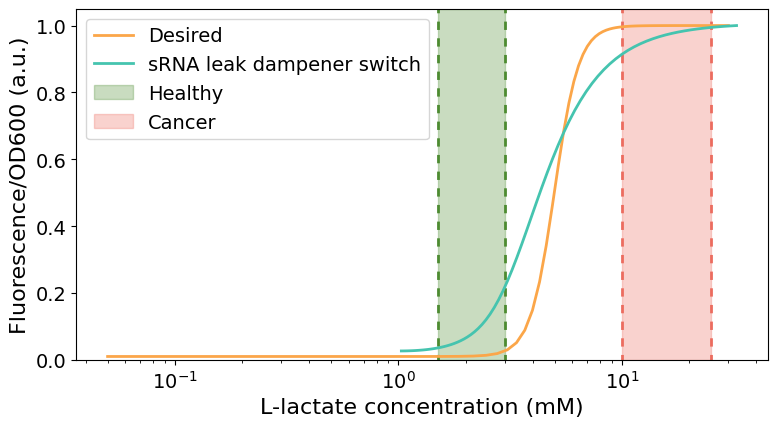

In [8]:
#Comparing desired graph vs sRNA system
#sRNA leak dampener switch
import Bassystem_GFP_pALPAGA_sRNA
reload(Bassystem_GFP_pALPAGA_sRNA)
from Bassystem_GFP_pALPAGA_sRNA import Bassystem_sRNA

model4 = Bassystem_sRNA()
concentrations = np.logspace(-1.5,1.5,100)
ec4, ec_response4, responses4, _simulations4 = model4.evaluate_dose_response(model4.params, concentrations)

plt.figure(figsize=(8,4.5), tight_layout=True)
plt.plot(x,y/10000, label="Desired")
plt.plot(concentrations+1,responses4/max(responses4), label="sRNA leak dampener switch")

plt.axvspan(1.5,3, color=colors['Green'], alpha=0.3, label='Healthy', zorder=1)
plt.axvspan(10,25, color=colors['Red'], alpha=0.3, label='Cancer', zorder=1)
plt.axvline(1.5,ymin =0, ymax=1, color=colors['Green'], linestyle=dashline, linewidth=2, zorder=1)
plt.axvline(3,ymin =0, ymax=1, color=colors['Green'], linestyle=dashline, linewidth=2, zorder=1)
plt.axvline(10,ymin =0, ymax=1, color=colors['Red'], linestyle=dashline, linewidth=2, zorder=1)
plt.axvline(25,ymin =0, ymax=1, color=colors['Red'], linestyle=dashline, linewidth=2, zorder=1)
plt.xlabel("L-lactate concentration (mM)")
plt.xscale("log")
plt.ylabel("Fluorescence/OD600 (a.u.)")
plt.legend()
plt.ylim(ymin=0)
plt.savefig("figures/desired_vs_srna.svg")